In [2]:
import matplotlib.pyplot as plt
import pandas as pd

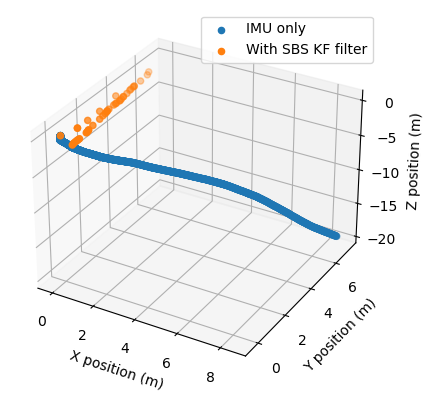

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
df1=pd.read_csv("/home/saab/Desktop/output_IMU.csv")
ax.scatter(df1["Pose_X"]-df1["Pose_X"][0],df1["Pose_Y"]-df1["Pose_Y"][0],df1["Pose_Z"]-df1["Pose_Z"][0])
df2=pd.read_csv("/home/saab/Desktop/output_filtered.csv")
ax.scatter(df2["Pose_X"]-df2["Pose_X"][0],df2["Pose_Y"]-df2["Pose_Y"][0],df2["Pose_Z"]-df2["Pose_Z"][0])

ax.set_xlabel('X position (m)')
ax.set_ylabel('Y position (m)')
ax.set_zlabel('Z position (m)')
ax.legend(["IMU only","With SBS KF filter"])

Text(0, 0.5, 'Y position (m)')

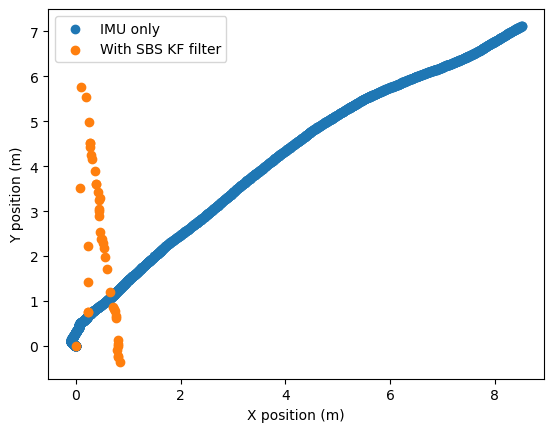

In [17]:
plt.scatter(df1["Pose_X"]-df1["Pose_X"][0],df1["Pose_Y"]-df1["Pose_Y"][0])
plt.scatter(df2["Pose_X"]-df2["Pose_X"][0],df2["Pose_Y"]-df2["Pose_Y"][0])


plt.legend(["IMU only","With SBS KF filter"])
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")

Text(0, 0.5, 'Y position (m)')

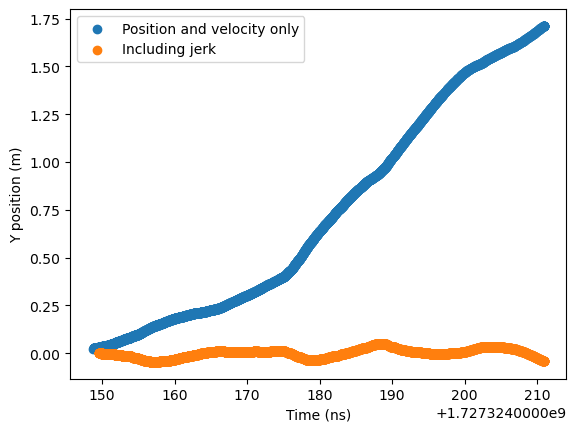

In [18]:
plt.scatter(df1["Timestamp"],-1*df1["Pose_Y"])
plt.scatter(df2["Timestamp"],df2["Pose_Y"])


plt.legend(["Position and velocity only","Including jerk"])
plt.xlabel("Time (ns)")
plt.ylabel("Y position (m)")

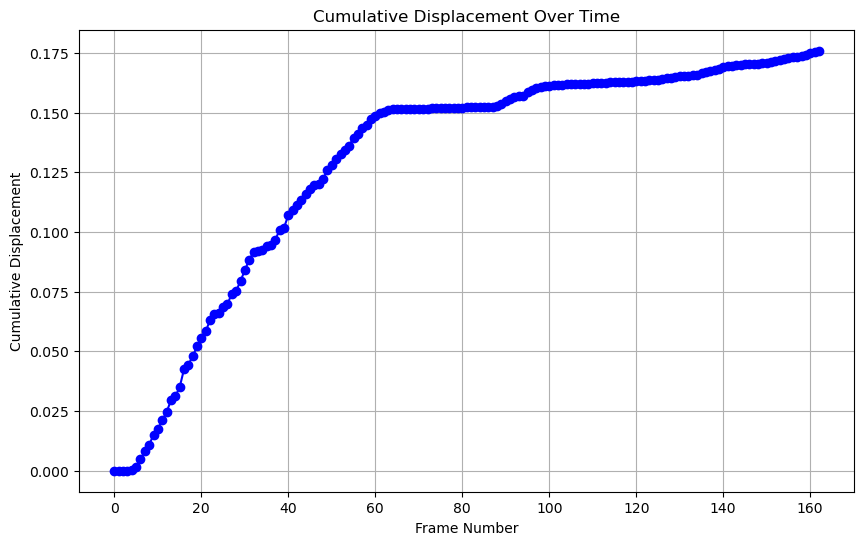

In [10]:
# Calculate cumulative displacement
cumulative_displacement = np.cumsum(displacements)*0.66/615

# Plot the cumulative displacement
plt.figure(figsize=(10, 6))
plt.plot(cumulative_displacement, marker='o', linestyle='-', color='b')
plt.title('Cumulative Displacement Over Time')
plt.xlabel('Frame Number')
plt.ylabel('Cumulative Displacement')
plt.grid(True)
plt.show()


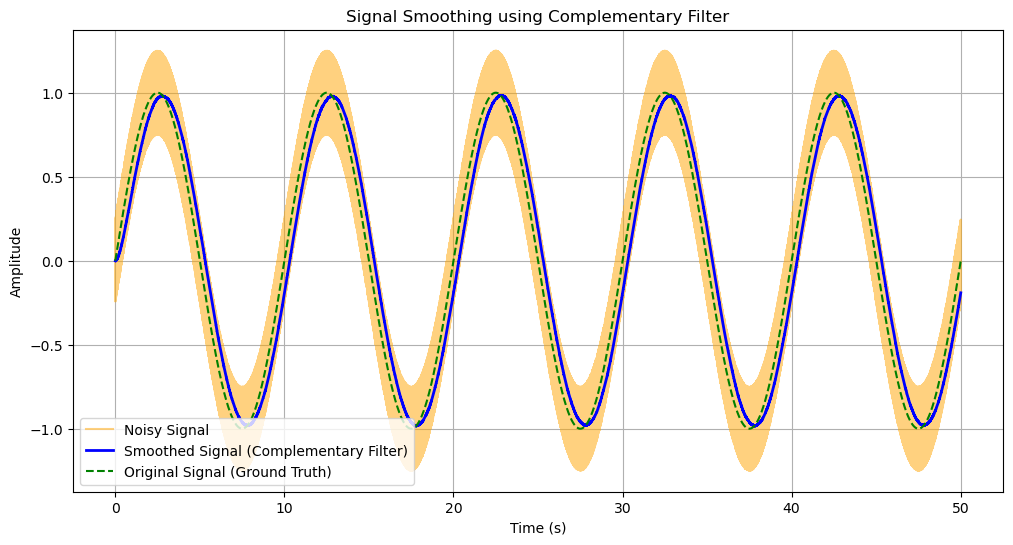

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Complementary Filter implementation for smoothing
class ComplementaryFilter:
    def __init__(self, sampling_time, cutoff_freq):
        tau = 1.0 / (2.0 * np.pi * cutoff_freq)
        self.alpha = sampling_time / (sampling_time + tau)
        self.prev_value = 0.0

    def smooth(self, raw_input):
        smoothed_value = self.alpha * raw_input + (1 - self.alpha) * self.prev_value
        self.prev_value = smoothed_value
        return smoothed_value

# Generate a noisy signal (sinusoid + noise)
np.random.seed(42)  # For reproducibility
sampling_time = 0.0001  # 10 ms sampling time
duration = 50  # 5 seconds
t = np.arange(0, duration, sampling_time)
signal = np.sin(0.2* np.pi * 1 * t)  # 1 Hz sine wave
noise = 0.5 * (np.random.rand(len(t)) - 0.5)
noisy_signal = signal + noise

# Apply Complementary Filter for smoothing
cutoff_freq = 0.5  # 2 Hz cutoff frequency
comp_filter = ComplementaryFilter(sampling_time, cutoff_freq)
smoothed_signal = [comp_filter.smooth(x) for x in noisy_signal]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(t, noisy_signal, label="Noisy Signal", alpha=0.5, color='orange')
plt.plot(t, smoothed_signal, label="Smoothed Signal (Complementary Filter)", color='blue', linewidth=2)
plt.plot(t, signal, label="Original Signal (Ground Truth)", color='green', linestyle='dashed')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Signal Smoothing using Complementary Filter")
plt.grid(True)
plt.show()


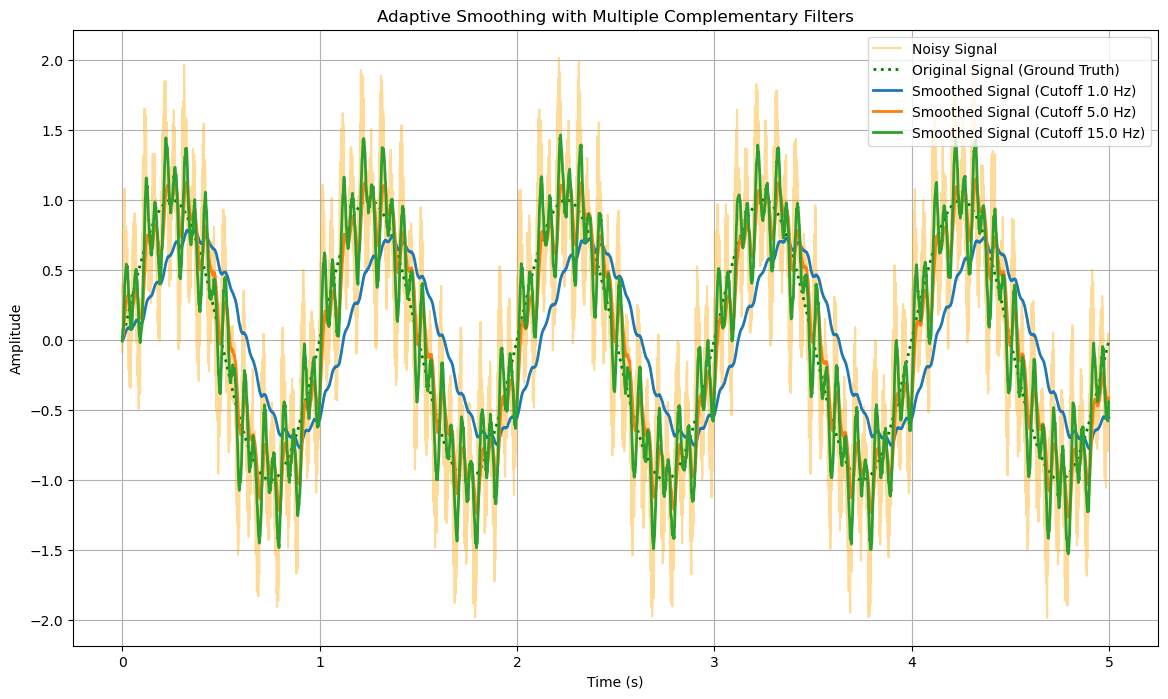

In [23]:
from scipy.signal import butter, filtfilt
import numpy as np
import matplotlib.pyplot as plt

# Complementary Filter implementation
class ComplementaryFilter:
    def __init__(self, sampling_time, cutoff_freq):
        tau = 1.0 / (2.0 * np.pi * cutoff_freq)
        self.alpha = sampling_time / (sampling_time + tau)
        self.prev_value = 0.0

    def smooth(self, raw_input):
        smoothed_value = self.alpha * raw_input + (1 - self.alpha) * self.prev_value
        self.prev_value = smoothed_value
        return smoothed_value

# Generate a noisy signal with different noise components
np.random.seed(42)
sampling_time = 0.001
duration = 5
t = np.arange(0, duration, sampling_time)
signal = np.sin(2 * np.pi * 1 * t)  # 1 Hz sine wave
noise_low = 0.3 * np.sin(2 * np.pi * 10 * t)  # 10 Hz low amplitude noise
noise_med = 0.5 * np.sin(2 * np.pi * 20 * t)  # 20 Hz medium amplitude noise
noise_high = 0.7 * (np.random.rand(len(t)) - 0.5)  # High-frequency random noise
noisy_signal = signal + noise_low + noise_med + noise_high

# Apply sequential complementary filters with different cutoff frequencies
cutoffs = [1.0, 5.0, 15.0]  # Different cutoff frequencies in Hz
smoothed_signals = []

for cutoff in cutoffs:
    comp_filter = ComplementaryFilter(sampling_time, cutoff)
    smoothed_signal = [comp_filter.smooth(x) for x in noisy_signal]
    smoothed_signals.append(smoothed_signal)

# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(t, noisy_signal, label="Noisy Signal", alpha=0.4, color='orange')
plt.plot(t, signal, label="Original Signal (Ground Truth)", color='green', linestyle='dotted', linewidth=2)

for i, cutoff in enumerate(cutoffs):
    plt.plot(t, smoothed_signals[i], label=f"Smoothed Signal (Cutoff {cutoff} Hz)", linewidth=2)

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Adaptive Smoothing with Multiple Complementary Filters")
plt.grid(True)
plt.show()
